### Importing Libraries

In [2]:
# Import libraries for data manipulation
import pandas as pd
import numpy as np

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot

# Import libraries for building linear regression model using statsmodel
from statsmodels.formula.api import ols
import statsmodels.api as sm

import scipy.stats as stats
from scipy.stats import levene, ttest_ind, f_oneway, kruskal, shapiro, kstest

# Importing Linear Regression from sklearn
from sklearn.linear_model import LinearRegression

# Import library for preparing data
from sklearn.model_selection import train_test_split

# Import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

### Read the Dataset

In [3]:
df = pd.read_csv("./bodyPerformance.csv")
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [5]:
# missing values column-wise
na_count = df.isnull().sum() # total count
na_pct = (na_count/len(df))*100 # percentage

na_df = pd.DataFrame({'Count': na_count.values,
                      'Percentage (%)': na_pct}).reset_index().rename(columns = {'index': 'Feature'})

na_df.sort_values(by='Percentage (%)', ascending=False)

,Feature,Count,Percentage (%)
0,age,0,0.0
1,gender,0,0.0
2,height_cm,0,0.0
3,weight_kg,0,0.0
4,body fat_%,0,0.0
5,diastolic,0,0.0
6,systolic,0,0.0
7,gripForce,0,0.0
8,sit and bend forward_cm,0,0.0
9,sit-ups counts,0,0.0


In [6]:
numeric_data = df.select_dtypes(exclude='object')
categorical_data = df.select_dtypes(include='object')

print(numeric_data.shape)
print(categorical_data.shape)

(13393, 10)
(13393, 2)


In [7]:
numeric_data.head()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,27.0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0
1,25.0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0
2,31.0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0
3,32.0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0
4,28.0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0


### EDA
- Numeric variables
- Categorical Variables

#### Box Plots

<Axes: >

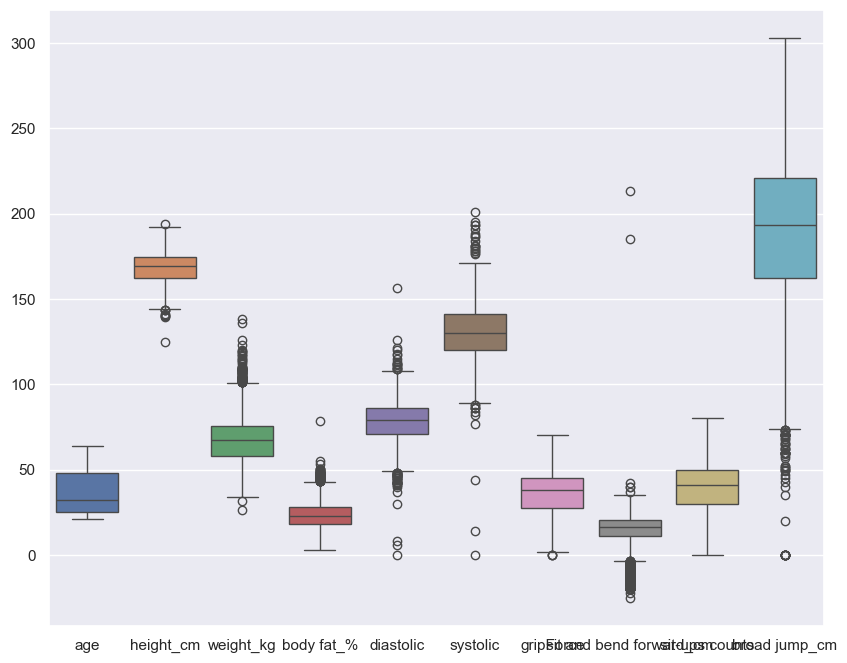

In [34]:
#Boxlot can plot outliers in data
plt.figure(figsize = (10, 8))
sns.boxplot(data = df)

<Axes: xlabel='weight_kg', ylabel='Density'>

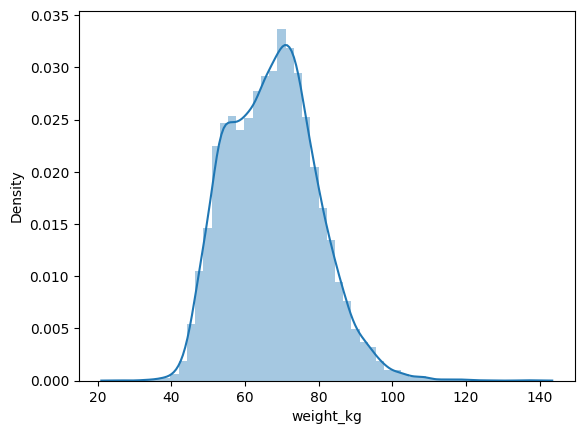

In [9]:
sns.distplot(df['weight_kg'],hist=True,kde=True)

### Continuous Variables

In [24]:
subset_df = numeric_data

# Get descriptive statistics for the selected features
statistics = subset_df.describe()

mean = statistics.loc['mean']
median = statistics.loc['50%']  # Median is the 50th percentile
std_dev = statistics.loc['std']

# Create a DataFrame to display the statistics in a table format
statistics_table = pd.DataFrame({'Mean': mean, 'Median': median, 'Standard Deviation': std_dev})

print(statistics_table)

                               Mean  Median  Standard Deviation
age                       36.775106    32.0           13.625639
height_cm                168.559807   169.2            8.426583
weight_kg                 67.447316    67.4           11.949666
body fat_%                23.240165    22.8            7.256844
diastolic                 78.796842    79.0           10.742033
systolic                 130.234817   130.0           14.713954
gripForce                 36.963877    37.9           10.624864
sit and bend forward_cm   15.209268    16.2            8.456677
sit-ups counts            39.771224    41.0           14.276698
broad jump_cm            190.129627   193.0           39.868000


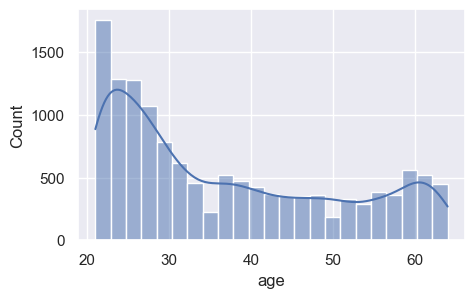

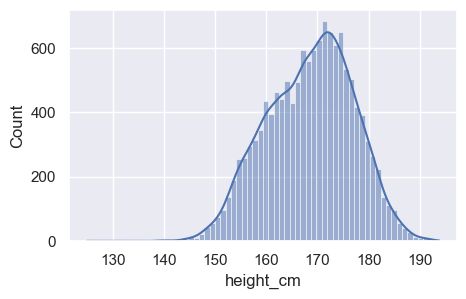

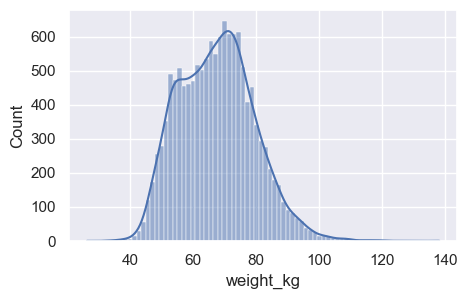

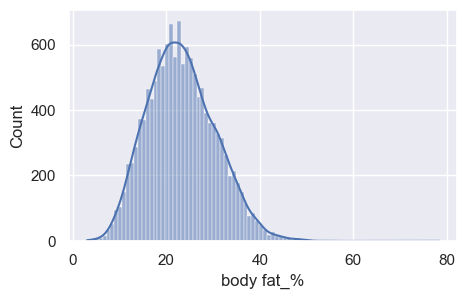

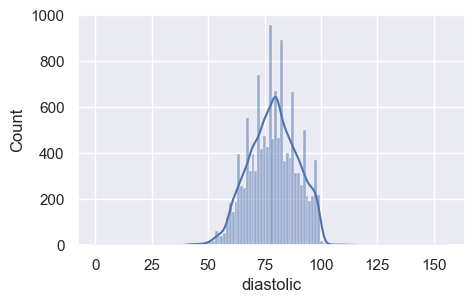

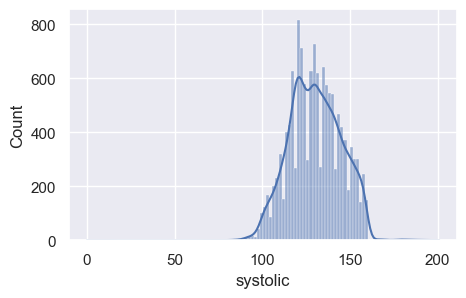

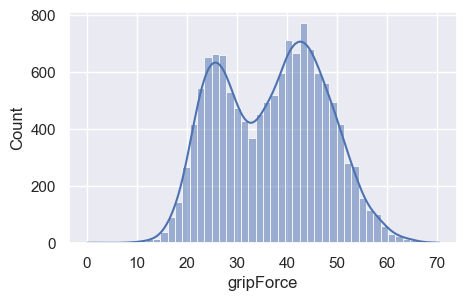

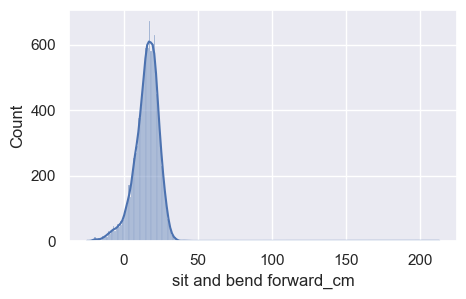

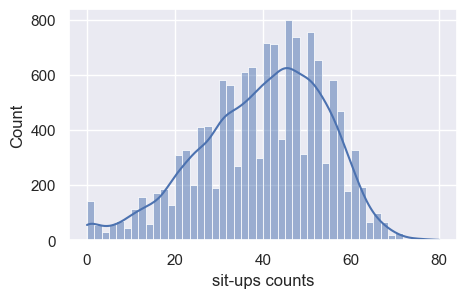

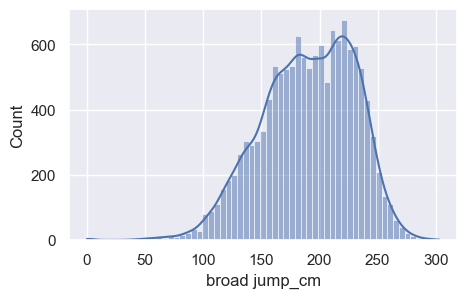

In [33]:
# let's plot all the columns to look at their distributions
for i in numeric_data.columns:
    plt.figure(figsize = (5, 3))
    sns.histplot(data = df, x = i, kde = True)
    plt.show()

#### Categorical Variables

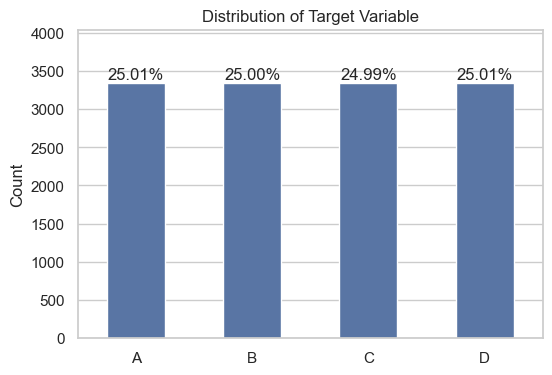

In [18]:
plt.figure(figsize = (6, 4))
ax = sns.countplot(x = df['class'], width = 0.5)

total = len(df['class'])
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha = 'center', va = 'bottom')

ax.set_title('Distribution of Target Variable')
ax.set_xticklabels(['A', 'B', 'C', 'D'])
plt.xlabel('')
plt.ylabel('Count')
ax.set_ylim(top = ax.get_ylim()[1] * 1.15)

plt.show()

<Figure size 1000x600 with 0 Axes>

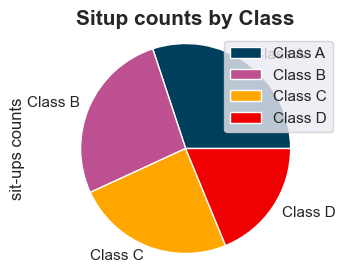

In [35]:
plt.figure(figsize=(10, 6))
labels=['Class A', 'Class B', 'Class C','Class D']
df.groupby(['class']).sum().plot(kind='pie', y='sit-ups counts',labels=labels, colors=['#003f5c', '#bc5090', '#ffa600','#f00000'])
plt.axis('equal')
plt.title('Situp counts by Class', fontsize=15, fontweight='bold');

<Figure size 500x300 with 0 Axes>

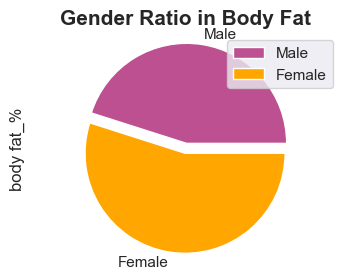

In [32]:
plt.figure(figsize=(5,3))
labels=['Male','Female']
df.groupby(['gender']).sum().plot(kind='pie', y='body fat_%',labels=labels, colors=['#bc5090', '#ffa600'],explode=(0.0, 0.1))
plt.axis('equal')
plt.title('Gender Ratio in Body Fat', fontsize=15, fontweight='bold');

<Axes: xlabel='class', ylabel='body fat_%'>

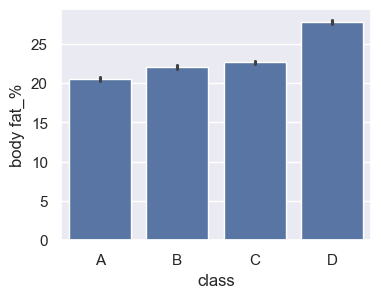

In [29]:
sns.set(rc = {'figure.figsize':(4,3)})
sns.barplot(data = df, x='class',y='body fat_%',order=['A','B','C','D'])

<Axes: xlabel='class', ylabel='count'>

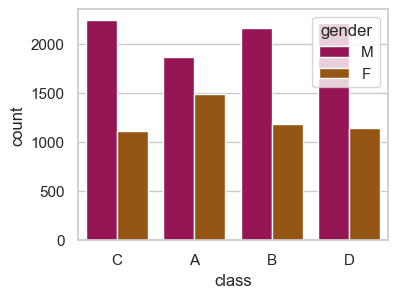

In [30]:
sns.set(rc = {'figure.figsize':(4,3)})
sns.set_style('whitegrid')
sns.countplot(x='class',hue='gender',data=df,palette='brg')

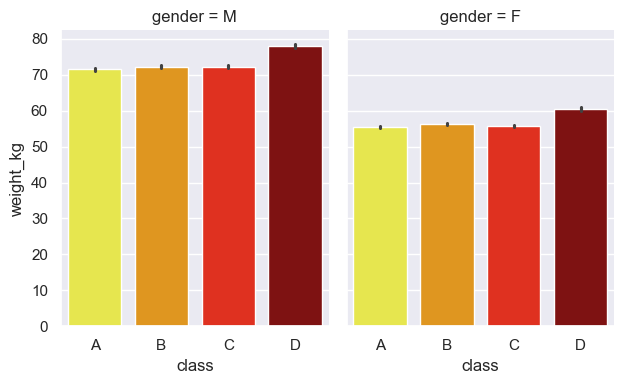

In [31]:
sns.set(rc = {'figure.figsize':(4,3)})
g = sns.FacetGrid(df, col="gender", height=4, aspect=0.8 )
g.map(sns.barplot, "class", "weight_kg",order=['A','B','C','D'],palette='hot_r' )